In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading and Combining the datasets

In [5]:
# Load the separate datasets
red = pd.read_csv('Data/Real_Datasets/winequality-red.csv', sep=';')
white = pd.read_csv('Data/Real_Datasets/winequality-white.csv', sep=';')

# Add a 'type' column to distinguish between red and white wines
red['type'] = 'red'
white['type'] = 'white'

# Combine datasets
wine_df = pd.concat([red, white], ignore_index=True)

# Display the shape of the combined dataset
print(wine_df.shape)  # Output: (6497, 13)

#save the combined unprocessed dataset
wine_df.to_csv("Data/Real_Datasets/wine_unprocessed.csv", index=False)

(6497, 13)


In [ ]:
Data exploration

In [6]:
print(wine_df.head())

print(wine_df.dtypes)

# Get summary statistics
print(wine_df.describe())

# Check for missing values
print(wine_df.isnull().sum())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

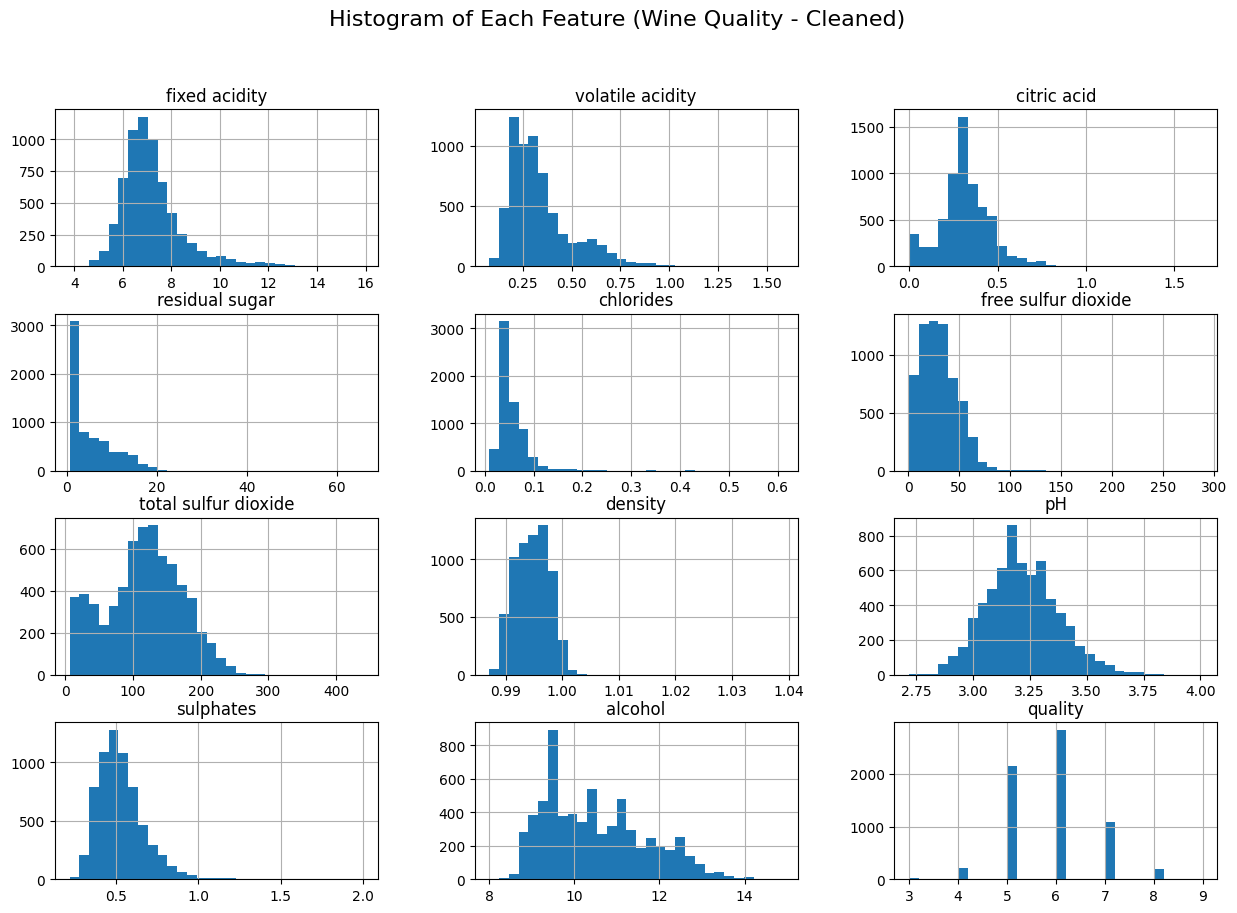

In [7]:
# Visual check for normality
wine_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram of Each Feature (Wine Quality - Cleaned)", fontsize=16)
plt.show()

Scaling and Normalizing
As shown in the histograms, not all the features are normally distributed. The only feature that is close to bell-shaped is PH. Quality, citric acid, alcohol, fixed acidity, density and Sulphates are moderately skewed. The rest of the features are heavily right-skewed and not normal, including residual sugar which is very skewed, chlorides, free sulfur dioxide, total sulfur dioxide, volatile acidity. Since Pearson correlation assumes that the data is normally distributed, the heavily skewed columns are transformed by np.log1p(), which reduces the right-skewness. Then we apply Standardization to all of the features which works better for roughly normal data.  

In [8]:
skewed_cols = [
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'volatile acidity'
]

for col in skewed_cols:
    wine_df[col] = np.log1p(wine_df[col])

In [9]:
from sklearn.preprocessing import StandardScaler

numeric_cols = wine_df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
wine_df[numeric_cols] = scaler.fit_transform(wine_df[numeric_cols])

print(wine_df.describe().T[['mean', 'std']])


                              mean       std
fixed acidity        -3.849639e-16  1.000077
volatile acidity      1.749836e-16  1.000077
citric acid           2.187295e-17  1.000077
residual sugar        3.499672e-17  1.000077
chlorides             0.000000e+00  1.000077
free sulfur dioxide  -1.749836e-16  1.000077
total sulfur dioxide  6.299409e-16  1.000077
density              -3.552167e-15  1.000077
pH                    2.729744e-15  1.000077
sulphates            -5.424491e-16  1.000077
alcohol               9.974065e-16  1.000077
quality              -3.105959e-16  1.000077


In [ ]:
Histogram after scaling

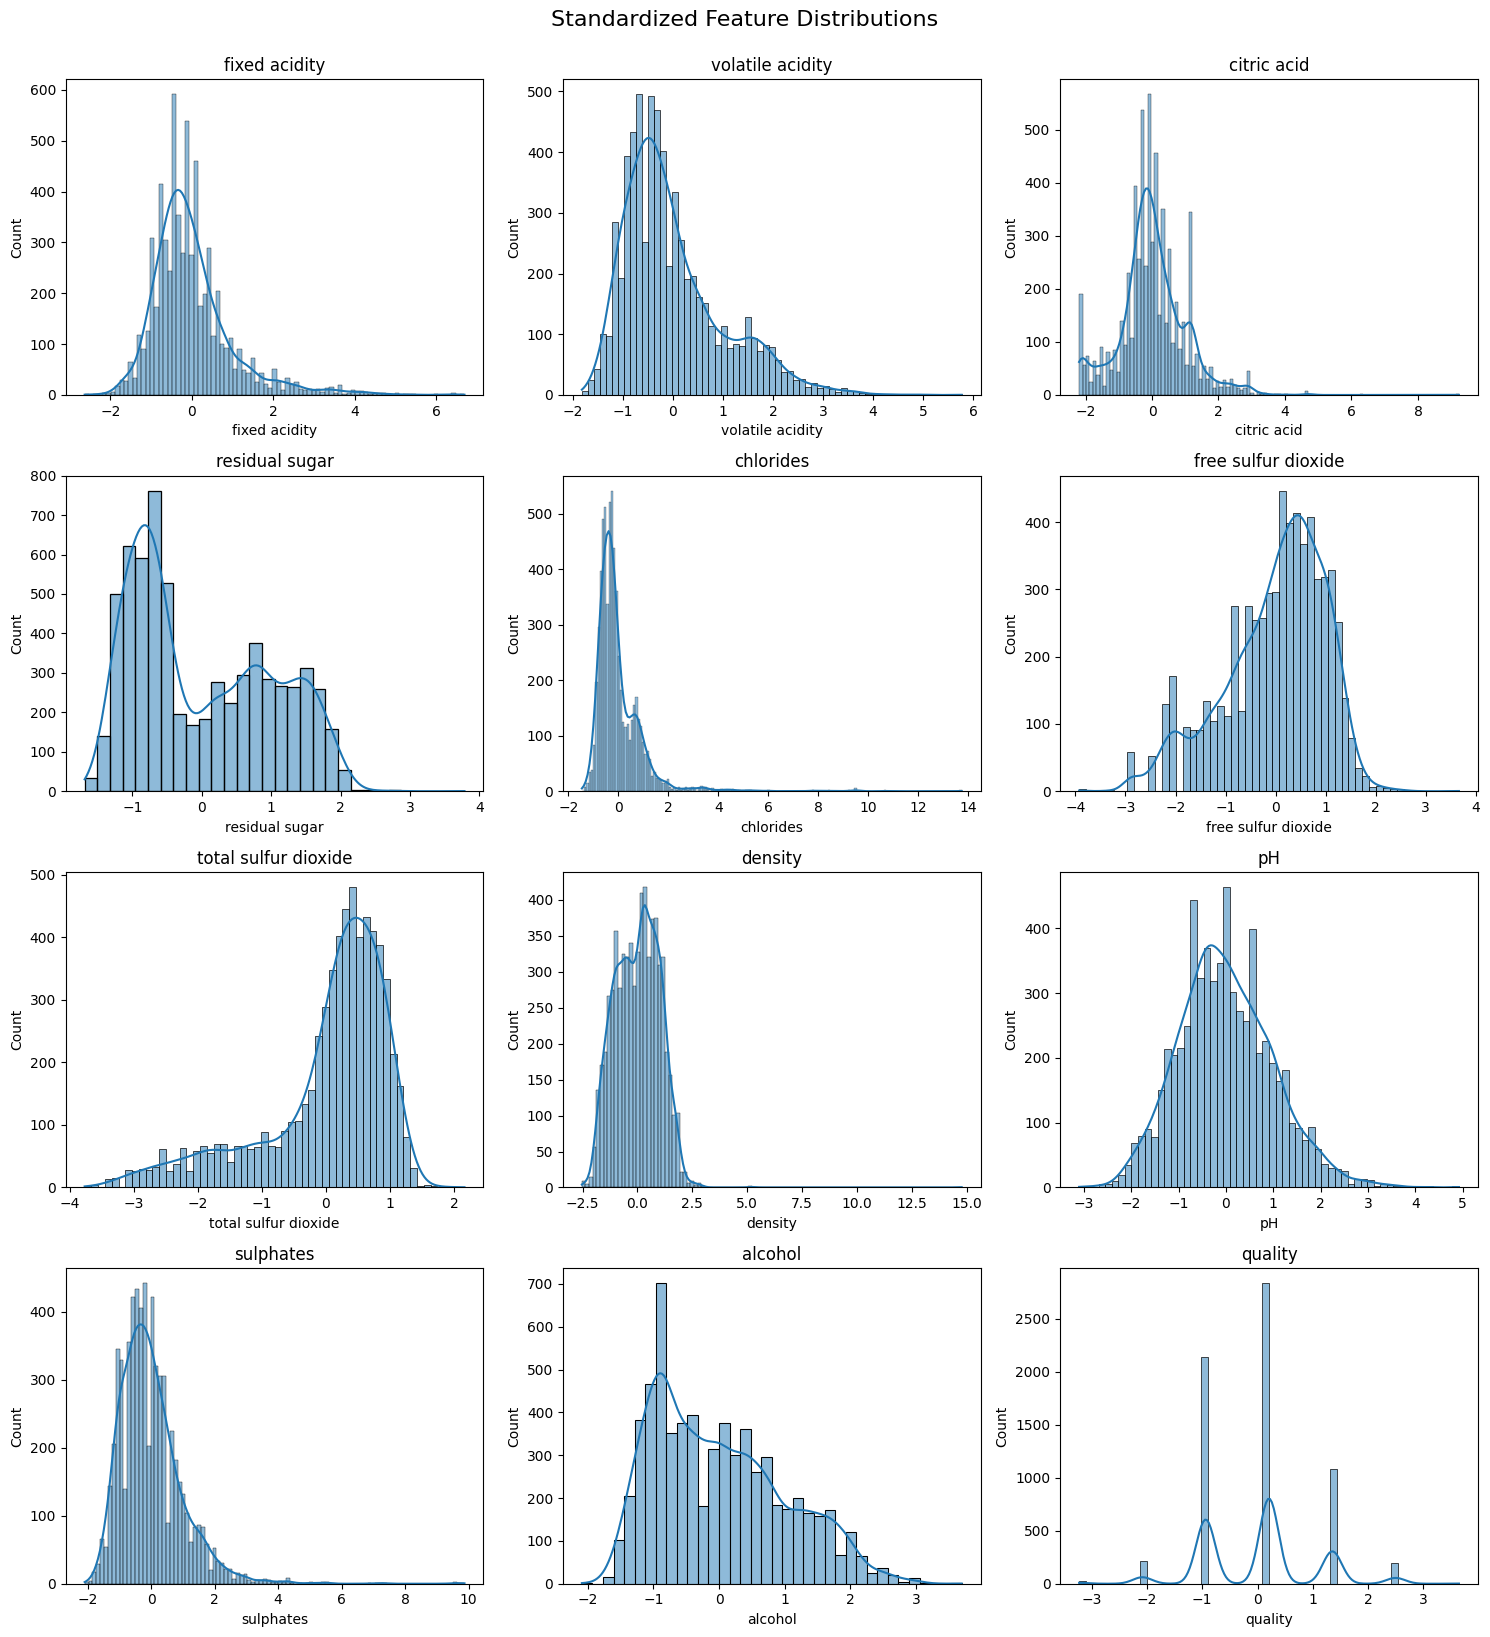

In [10]:
numeric_cols = wine_df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3  # charts per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # auto-calculate rows

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(wine_df[col], kde=True)
    plt.title(f"{col}")
    plt.tight_layout()

plt.suptitle("Standardized Feature Distributions", fontsize=16, y=1.02)
plt.show()

In [11]:
#saving the processed dataset
wine_df.to_csv("Data/Real_Datasets/wine_processed.csv", index=False)

Checking the Pearson and Spearman correlations for original data

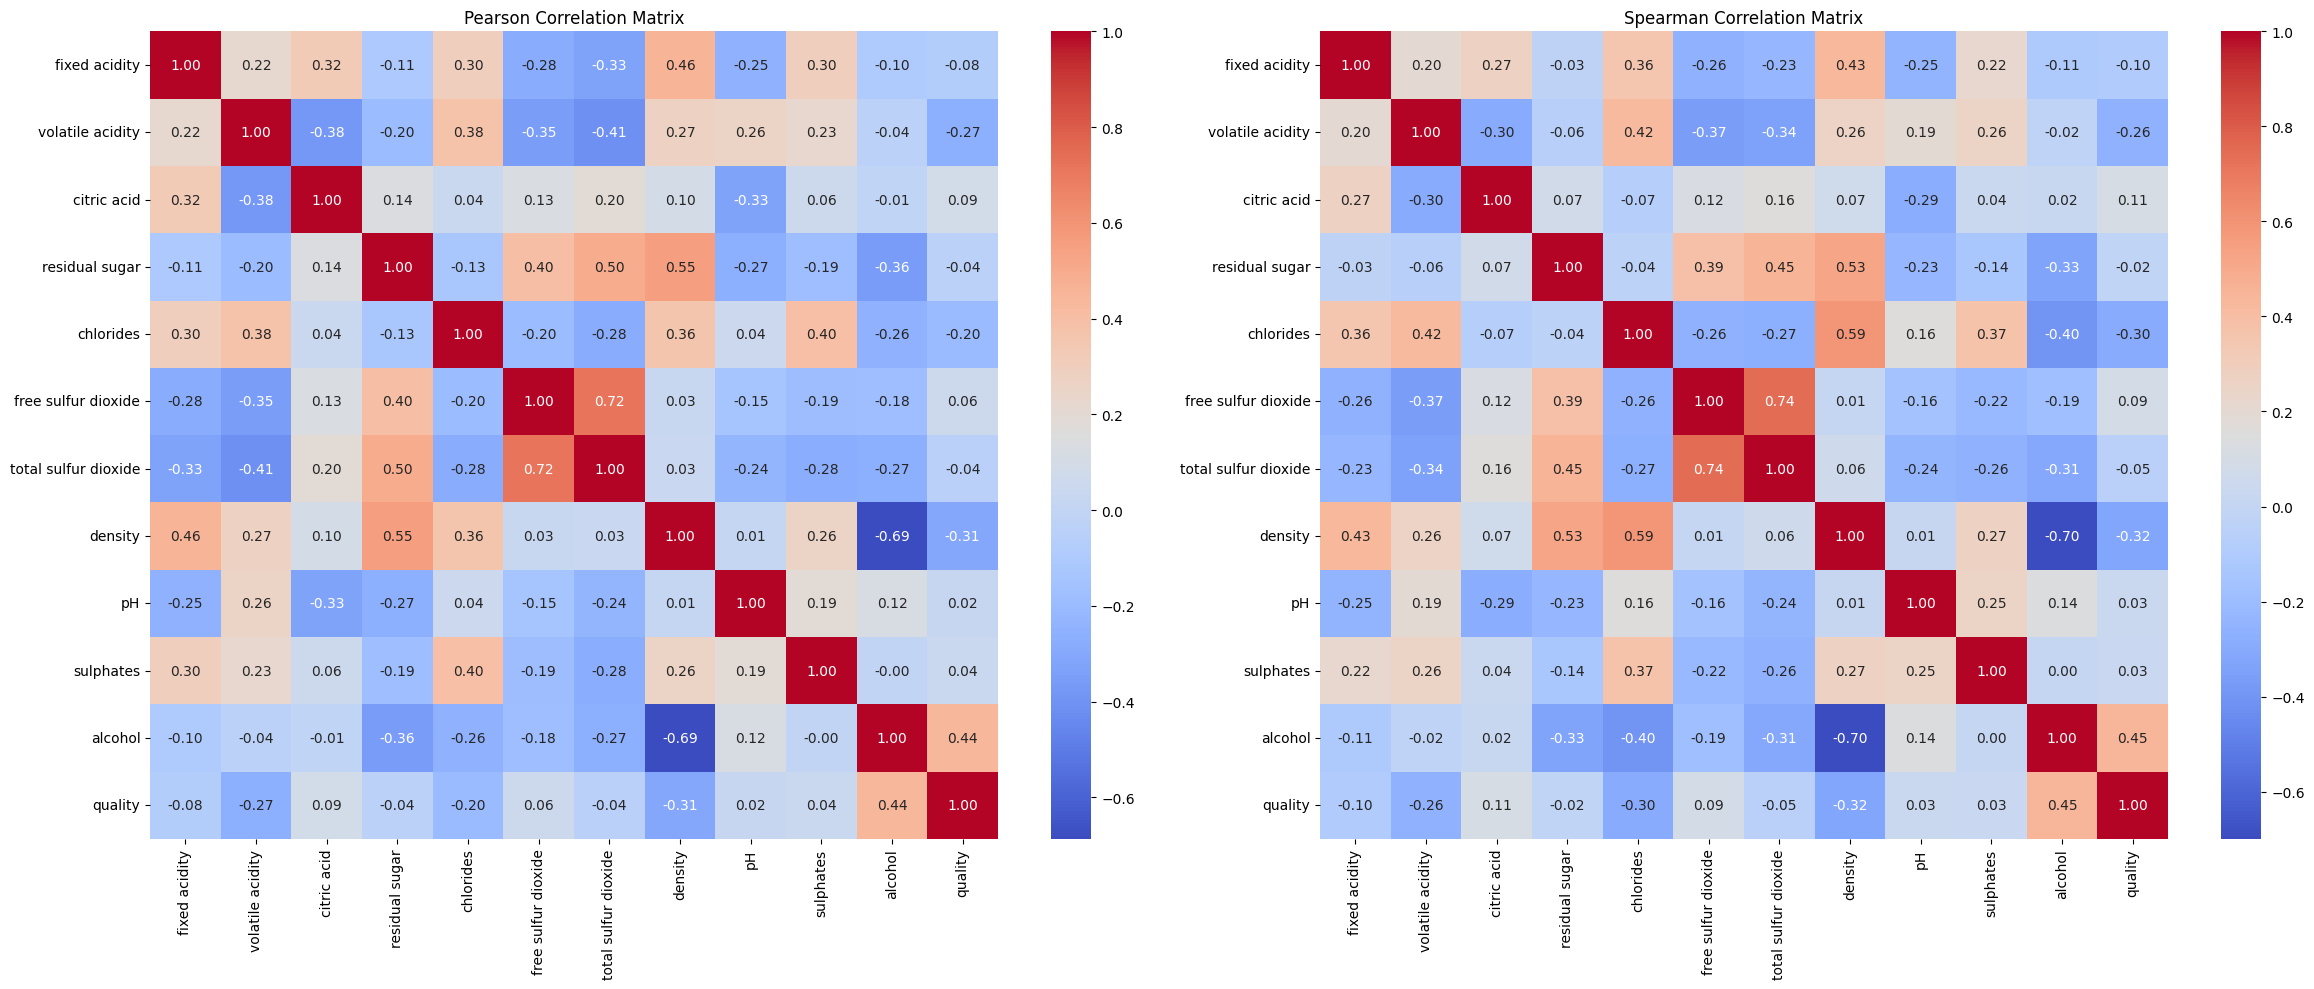

In [20]:
#loading the unprocessed dataset

wine_df_org = pd.read_csv("Data/Real_Datasets/wine_unprocessed.csv")

# Only use numeric columns for correlation
numeric_df = wine_df_org.select_dtypes(include=['float64', 'int64'])

# Pearson and Spearman Correlation
pearson_corr = numeric_df.corr(method='pearson')
spearman_corr = numeric_df.corr(method='spearman')

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 10))  # 1 row, 2 columns

# Pearson plot
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0])
axes[0].set_title("Pearson Correlation Matrix")

# Spearman plot
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title("Spearman Correlation Matrix")

plt.tight_layout()
plt.show()

Pearson ans Spearman for the processed data

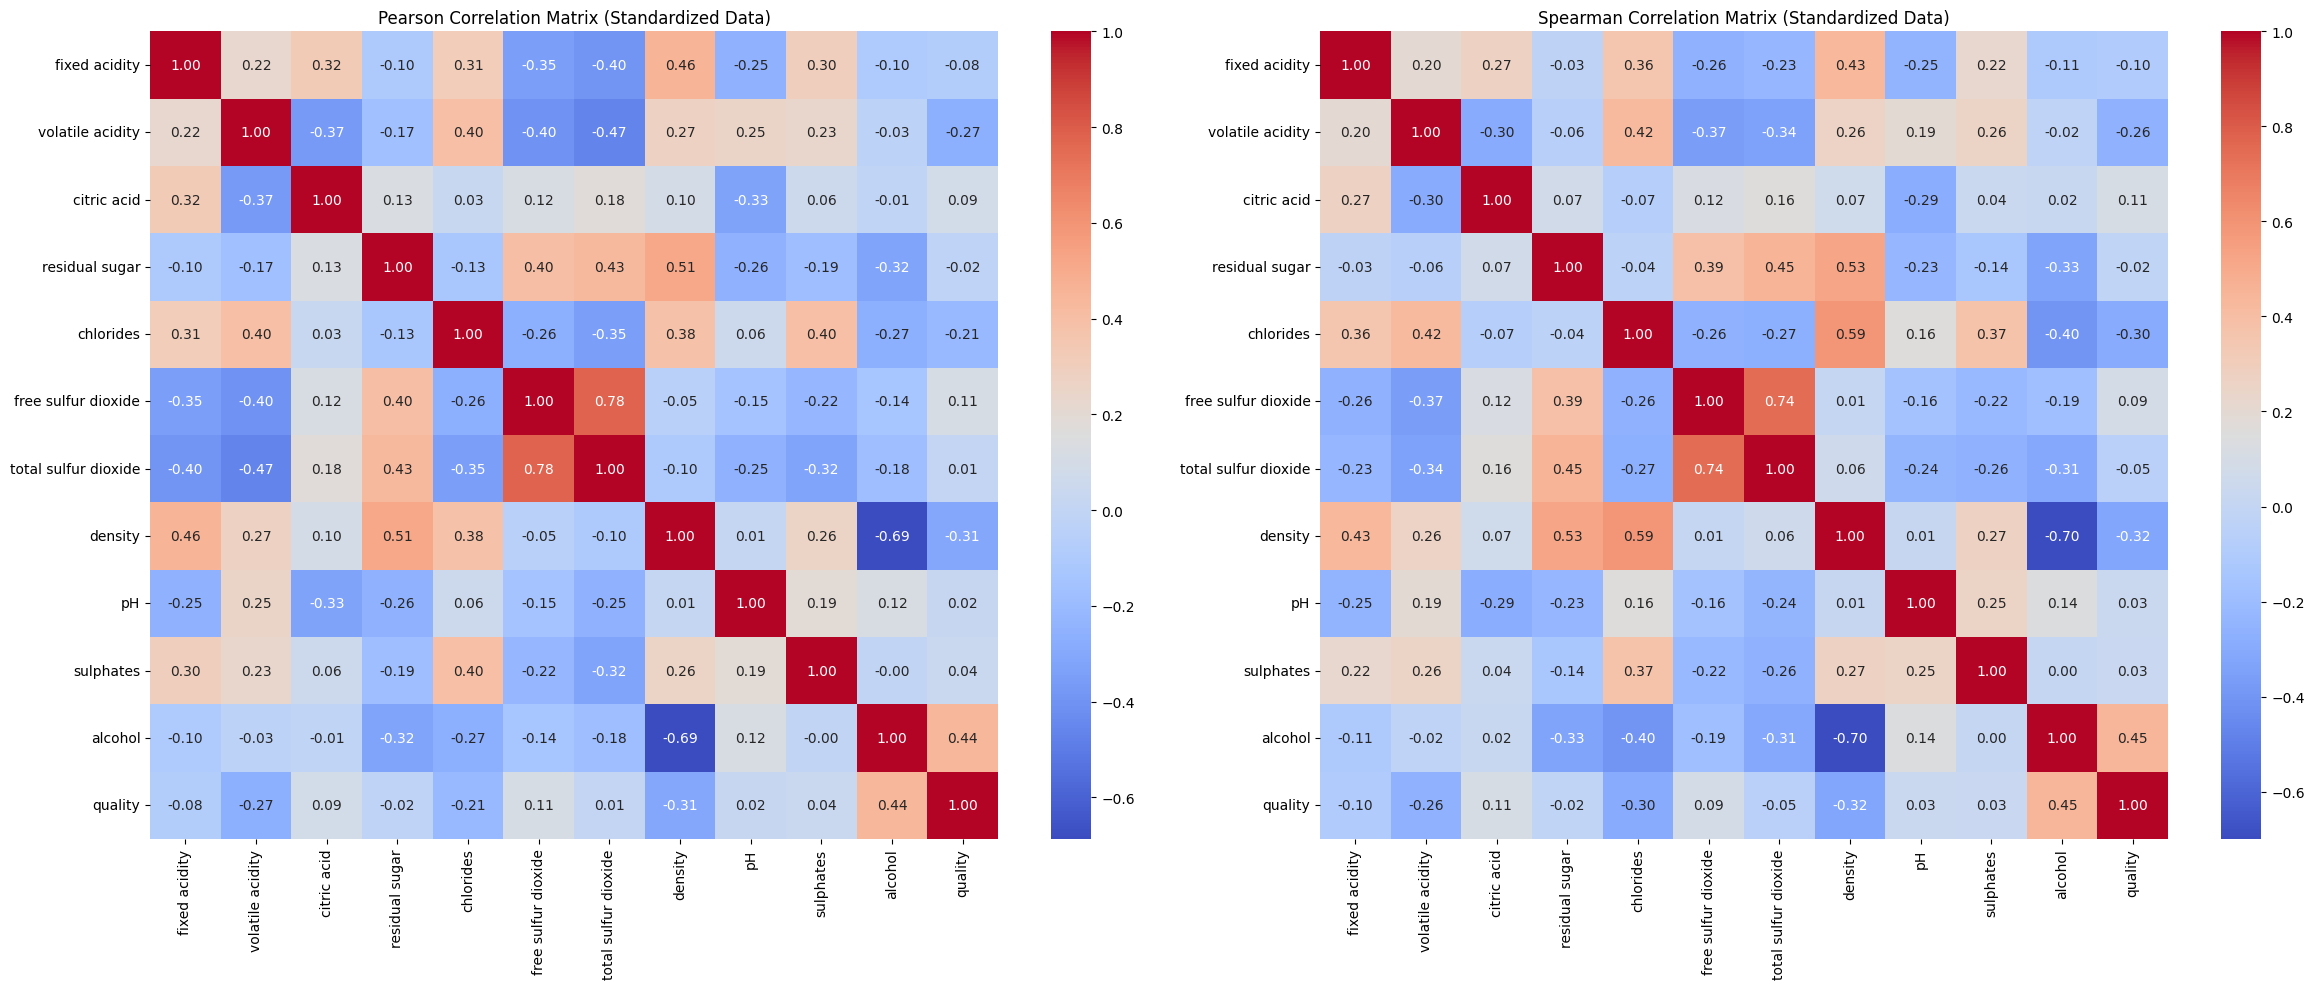

In [22]:
# Pearson and Spearman Correlation (Standardized Data)

numeric_df_processed = wine_df.select_dtypes(include=['float64', 'int64'])

pearson_corr = numeric_df_processed.corr(method='pearson')
spearman_corr = numeric_df_processed.corr(method='spearman')

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(24, 10))  # 1 row, 2 columns

# Pearson plot
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0])
axes[0].set_title("Pearson Correlation Matrix (Standardized Data)")

# Spearman plot
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title("Spearman Correlation Matrix (Standardized Data)")

plt.tight_layout()
plt.show()

In [23]:
import os
os.getcwd()

'/Users/parisakhosravi/Thesis'

In [24]:
from scipy import stats
import pandas as pd

In [25]:
df = pd.read_csv("Data/Real_Datasets/wine_processed.csv")

numeric = df.select_dtypes(include=["float64","int64"])
zs = pd.DataFrame(stats.zscore(numeric), columns=numeric.columns)

# 3. Keep only rows where every z-score is within ±3
mask = (zs.abs() <= 3).all(axis=1)
df_no_out = df[mask].reset_index(drop=True)

# 4. Check how many you kept
print(f"Kept {len(df_no_out)}/{len(df)} rows after outlier removal")

# 5. Save to a new CSV
df_no_out.to_csv("Data/Real_Datasets/wine_no_outliers.csv", index=False)

Kept 6007/6497 rows after outlier removal
